In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Importing the dataset
# Импортруйте датасет и разделите их на X and y.
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:].values
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [19]:
# Feature Scaling
# Стандартизируйте X и y.
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
# Fitting SVR to the dataset
# 1. Импортируйте класс SVR из sklearn svm
from sklearn.svm import SVR
# 2. Создайте объект (с именем regressor) класса SVR и дайте ему параметр кернела (Гауссовый). Для этого прочтите документацию
regressor = SVR(kernel='rbf', epsilon=0.001, degree=2.5)
# 3. Fit the X and y в ваш регрессор
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=2.5, epsilon=0.001, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
# Predicting a new result
svr_pred = regressor.predict(X)
# сделайте предсказание на уровень 6.5
temp = sc_x.transform([[6.5]])
y_pred = np.reshape(regressor.predict(temp), (-1,1))
# демасштабируйте y_pred с помощью метода inverse_transform()
sc_y.inverse_transform(y_pred)

array([[165331.4204768]])

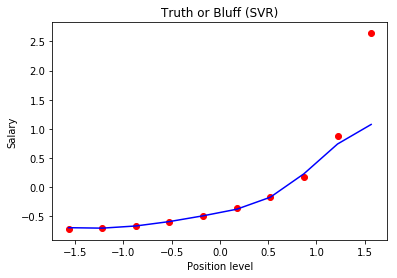

In [31]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [32]:
# Ниже визуализация с помощью более частого шага (0,01)

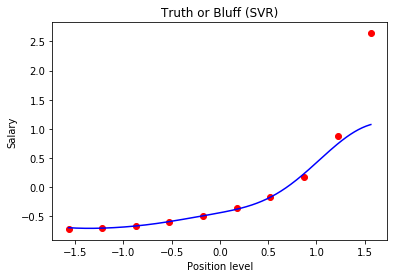

In [33]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Second Task

In [34]:
# SLR
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
slr_pred = slr.predict(X)

In [35]:
# PLR
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X)
X_poly
poly_reg.fit(X_poly, y)
plr = LinearRegression()
plr.fit(X_poly, y)
plr_pred = plr.predict(poly_reg.fit_transform(X))

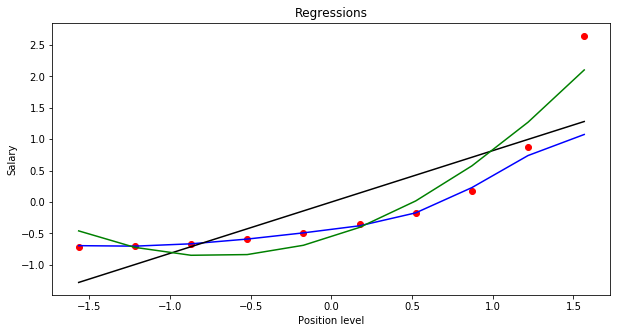

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, color = 'red')
plt.plot(X, svr_pred, color = 'blue')
plt.plot(X, slr_pred, color = 'black')
plt.plot(X, plr_pred, color = "green")
plt.title('Regressions')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()